<a href="https://colab.research.google.com/github/LightEagle89/test2/blob/main/%D0%94%D0%97%E2%84%964.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [420]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import scipy.stats
import scipy as sp

# Задача №1 (3б)

Пусткай у вас имеется датасет с описанием людей и меткой ' <=50K', которая показывает, получает ли человек (в США) более или менее 50к$ в год. Используя теорему Байеса покажите, что с ростом образования вероятность получать >50k в год растет.

Код загрузки данных и результирующая таблица предоставлены.

[Подсказка, теорема Байеса говорит нам, что

$$P( > или < 50k|класс-образования) = \frac{P(класс-образования | > или < 50k) * P(> или < 50k)}{P(наблюдать-этот-класс-образования)}$$


Для лаконичной агрегации данных в pandas встроена функция [group by](https://realpython.com/pandas-groupby/)
]

In [ ]:
df_temp = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
columns = ('age workclass fnlwgt education educ-num marital-status occupation relationship '
           'race sex capital-gain capital-loss  hours-per-week native-country salary')
df_temp.columns = columns.split()

In [ ]:
df_temp.head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df_temp[['education', 'salary']].head()

,education,salary
0,Bachelors,<=50K
1,HS-grad,<=50K
2,11th,<=50K
3,Bachelors,<=50K
4,Masters,<=50K


In [ ]:
df_temp.groupby(['education'])['education'].count().sort_values(ascending = False)

education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [ ]:
df_temp[['education', 'salary']].groupby(['salary'])['salary'].count()

salary
 <=50K    24719
 >50K      7841
Name: salary, dtype: int64

In [ ]:
print(df_temp[df_temp['salary'] == " <=50K"]['salary'].count() / df_temp[['education','salary']].groupby(['salary'])['salary'].count().sum())
print(df_temp[df_temp['salary'] == " >50K"]['salary'].count() / df_temp[['education','salary']].groupby(['salary'])['salary'].count().sum())

0.7591830466830467
0.24081695331695332


Подсказка: см. мультииндекс и groupby

Да, код не иметь "красивое" решение

In [ ]:
df = df_temp[df_temp['salary'] == ' <=50K'].groupby('education').count()
df['salary2'] = ' <=50K'
df2 = df_temp[df_temp['salary'] == ' >50K'].groupby('education').count()
df2['salary2'] = ' >50K'
df3 = pd.concat([df,df2])
df3['people'] = df3.groupby('education')['salary'].sum()
df3.sort_values(by = 'education', inplace=True)
df3.drop(['age', 'workclass', 'fnlwgt', 'educ-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'], axis = 1, inplace = True)
df3.insert(0,'<=50K',df3['salary2'])
df3.drop('salary2', axis = 1, inplace=True)
df3['P1'] = df3['people'] / df3['salary'].sum()
df4 = df3[df3['<=50K'] == ' <=50K'].copy()
df4['P2'] = df4.salary.sum() / df4.people.sum()
df5 = df3[df3['<=50K'] == ' >50K'].copy()
df5['P2'] = df5.salary.sum() / df5.people.sum()
df6 = pd.concat([df4,df5])
df6.sort_values(by = 'education', inplace=True)
df6['P4'] = df6.salary / df6.people
df6['P3'] = df6.P1 / df6.P2 * df6.P4
df6.insert(5,'P33',df6['P3'])
df6.drop('P3', inplace=True, axis = 1)
df6.rename(columns={'P33': 'P3'}, inplace=True)
df6.reset_index(inplace=True)
df6.loc[(df6['<=50K'] == ' >50K'), 'education'] = ''
df6.set_index('education', inplace=True)
df6

,<=50K,salary,people,P1,P2,P3,P4
education,,,,,,,
10th,<=50K,871,933,0.028655,0.759183,0.035236,0.933548
,>50K,62,933,0.028655,0.241195,0.007895,0.066452
11th,<=50K,1115,1175,0.036087,0.759183,0.045107,0.948936
,>50K,60,1175,0.036087,0.241195,0.007640,0.051064
12th,<=50K,400,433,0.013299,0.759183,0.016182,0.923788
,>50K,33,433,0.013299,0.241195,0.004202,0.076212
1st-4th,<=50K,162,168,0.005160,0.759183,0.006554,0.964286
,>50K,6,168,0.005160,0.241195,0.000764,0.035714
5th-6th,<=50K,317,333,0.010227,0.759183,0.012824,0.951952


Из таблицы видно, что вероятность получать более 50 тыс $ в год растет с образованием. См. вероятности >50K у бакалавров, мастеров и докторов (0.414830, 0.556587, 0.740920)

# Задача 2 (2б)

Производитель спринклерных установок, используемых для противопожарной защиты офисных зданий, утверждает, что истинная средняя температура срабатывания системы составляет 130°. Выборка из n = 9 систем при тестировании дает среднюю температуру активации образца 131,08°F. Если распределение времени активации нормально при стандартном отклонении 1,5°F, противоречат ли данные утверждениям производителя на уровне значимости $\alpha = 0.01$?

В решении не использовать готовый функционал из stats. Следует расписать (тезисно основные шаги)

In [ ]:
Нулевая гипотеза: средняя температура активации = 130
Альтернативная гипотеза: средняя температура активации <> 130
Z = (среднее по выборке - среднее) / (стандартное отклонение / sqrt (количество образцов)) =

In [ ]:
 from math import sqrt
 Z = (131.08 - 130) / (1.5 / sqrt (9))
 Z

2.160000000000025

In [ ]:
Необходимо найти P-значение, чтобы принять решение в отношении нулевой гипотезы (отклонить или не отклонить)
С учетом значения Z выше, смотри по Z-таблице:
p = P (Z <-2,16) + P (Z> 2,16) = 2 * (1 - 0,9846) =


Замечание: неравенство в Ха подразумевает, что тест является двусторонним, поэтому значение P является результатом удвоения захваченной площади хвоста:

P = 2[1 - Ф(z_stat)] = ...

In [ ]:
p = 2 * (1 - 0.9846)
p

0.03079999999999994

Вывод:

Поскольку полученное значение P (3%) превышает уровень значимости (1%), это означает, что нулевую гипотезу не отклоняем.

# Задача 3 (3б)

Динамический конический пенетрометр (ДКП) используется для измерения сопротивления материала проникновению, так как конус вбивается в дорожное покрытие или основание. Предположим, что для конкретного применения необходимо, чтобы истинное среднее значение ДКП для определенного типа покрытия было меньше 30. Это покрытие не будет использоваться до тех пор, пока не будет убедительно доказано, что технические условия были соблюдены. Проверить соответствующие гипотезы, используя следующие данные: 

In [421]:
arr = [14.1, 14.5, 15.5, 16.0, 16.0, 16.7, 16.9, 17.1, 17.5, 17.8, 17.8, 18.1, 18.2, 18.3, 18.3, 19.0, 19.2, 19.4, 20.0, 20.0, 20.8, 20.8, 21.0, 21.5, 23.5, 27.5, 27.5, 28.0, 28.3, 30.0, 30.0, 31.6, 31.7, 31.7, 32.5, 33.5, 33.9, 35.0, 35.0, 35.0, 36.7, 40.0, 40.0, 41.3, 41.7, 47.5, 50.0, 51.0, 51.8, 54.4, 55.0, 57.0]

Визуализировать данные с помощью описательных статистик (см. вывод ниже) и построить .95 доверительные интервалы для $\mu, \sigma, Median$

Истинное среднее значение предоставляет информацию о центральном положении переменной особенно если сообщается ее доверительный интервал. Доверительный интервал - диапазон значений выше и ниже точечной оценки, которая фиксирует истинный параметр популяции на некотором заранее определенном доверительном уровне. Нужно вычислить доверительный интервал, затем скорректировать на величину погрешности для создания диапазона, которая зависит от желаемого уровня доверия, разброса данных и размера выборки. Предельная ошибка выборки - величина, определяющая, с определенной степенью вероятности, максимальное значение, на которое результаты выборки отличаются от результатов генеральной совокупности. Можно вычислить стандартное отклонение генеральной совокупности и далее посчитать величину погрешности: z∗σ/sqrt(n)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


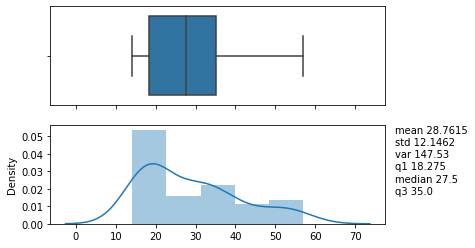

In [422]:
df = pd.DataFrame(arr)
df.index

RangeIndex(start=0, stop=52, step=1)

In [507]:
import math
import scipy.stats as stats
z_critical = stats.norm.ppf(q = 0.975)
pop_stdev = np.array(arr).std() 
margin_of_error = z_critical * (pop_stdev/math.sqrt(len(arr)))
sample_mean = np.mean(df).values[0]
sample_mean - margin_of_error, sample_mean + margin_of_error

(25.46022564830602, 32.06285127477091)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1440x1440 with 0 Axes>

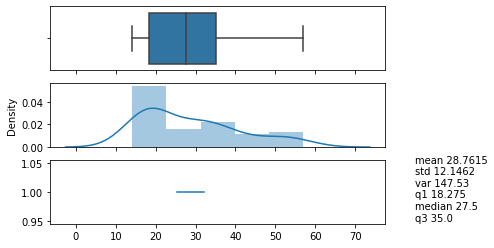

In [530]:
plt.figure(figsize=(20,20))
f, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True)
sns.boxplot(arr, orient = 'h', ax =ax1)
sns.distplot(df, ax = ax2)
plt.yticks(np.arange(0,0.06,0.01))
mean = round(np.mean(df).values[0],4)
std = round(np.std(df).values[0],4)
var = round(np.var(df).values[0],2)
q1 = round(np.percentile(df,25),3)
median = np.median(df)
q3 = round(np.percentile(df,75),3)
plt.text(85, 1.05, 'mean {}'.format(mean))
plt.text(85, 1.03, 'std {}'.format(std))
plt.text(85, 1.01, 'var {}'.format(var))
plt.text(85, 0.99, 'q1 {}'.format(q1))
plt.text(85, 0.97, 'median {}'.format(median))
plt.text(85, .95, 'q3 {}'.format(q3))
x1, y1 = [sample_mean - margin_of_error, sample_mean + margin_of_error], [1, 1]
plt.xticks(np.arange(0,80,10))
plt.yticks(np.arange(0.95,1.05,0.05))
plt.plot(x1, y1)
plt.show()

In [531]:
yerr=[(top-bot)/2 for top,bot in intervals]
yerr[0]

-0.7528151480425045

In [ ]:
доверительный интервал медианы
n = 52
Точечная оценка медианы: 
1/2 (x26 + x27) = 1/2 * (27.5 + 28) = 27.75
По таблице k = 19 ---> x19 = 20 ---> Медиана совокупности с вероятностью 0,95 больше или равна 20.

In [ ]:
Доверительный интервал для стандартного отклонения:
Необходимо построить симметричный интервал по формуле:
s(1-q) < σ < s(1+q),где значения q отыскиваются по соответствующей таблице.
Согласно выборке n = 50 и вероятности 0.95, значение q равно 0,21.
s - среднеквадратическое отклонение и равно 12.264698
Таким образом, 9.68911142 < σ < 14.840284579999999

Ваш вывод


Исходя из полученных значений доверительных интервалов, можно сделать вывод о том, что вероятное значение (истинное среднее значение ДКП, которое должно быть менее 30) с 95% вероятностью будет составлять менее 30 и находиться в пределах доверительного интервала.

# Задача 4 (2б)


Обширный мониторинг компьютерной системы совместного использования времени показал, что время отклика на конкретную команду редактирования, как правило, распределяется со стандартным отклонением 25 миллисекунд. Была установлена новая операционная система, и мы хотим оценить истинное среднее время отклика $\mu$ для новой среды. Если предположить, что время отклика все еще нормально распределено с $\sigma = $ 25, то какой размер выборки необходим для того, чтобы получившийся 95% доверительный интервал имел ширину (максимум) 10?

Ваши рассуждения

Доверительный интервал:
μ +- tα/2;dfsqrt(σ^2/n)
Отсюда можно вывести формулу ширины доверительного интервала:
w = 2tα/2;dfsqrt(σ^2/n),
Заменив t-статистику Стьюдента на z стандартного нормального распределения и заменив половину W на погрешность измерения E, получаем:
E = zα/2sqrt(σ^2/n)

Найдем sqrt(n):

In [597]:
import scipy.stats as stats
z_critical = stats.norm.ppf(q = 0.975)
round(z_critical * 25 / (10/2),2)

9.8

In [598]:
round(z_critical * 25 / (10/2),2) ** 2

96.04000000000002

Ваш вывод

Полученные результаты, в частности размер выборки, указывают на то, что с заданной вероятностью в 0.95 истичнное среднее время отклика в новой операционной системе составляет 25 или менее мс.

# Задача на бонусный балл

Предположим мы сместили центр масс монеты таким образом, что выпадает она в 65% случаев решкой. Сколько подбрасываний нужно при заданном уровне значимости, чтобы определить, что она фальшивая? (ну т.е. не 50/50 вероятности орел/решка)

Ваши рассуждения

In [ ]:
Вероятность выпадения решки: (Р / (О + Р))
Предельная допустимая ошибка составляет abs(p-r) < E при заданнном уровне значимости
p - ожидаемая вероятность получения решки, r - заданная вероятность выпадения решки в 1 броске
Заданнный уровень значимости определяется Z, максимальный уровень ошибки - E.
Стандартная ошибка = sqrt((p*(1-p))/n)
n - количество бросков

Преобразовав формулу, получим:
стандартная ошибка = sqrt((.65*(1-.65))/n) = sqrt((.2275)/n)
Максимальная ошибка (E) = Z * sqrt((.2275)/n) 
Отсюда количество бросков (n) = 0.2275 * Z**2 /E**2
Допустим, при уровне максимальной ошибки в 0.01, количество бросков будет определяться:
n = 0.2275 * Z**2 / 0.01**2 = 2275Z**2
Таким образом, для достижения вероятности 99.99% (Z = 3.891) потребуется 34444 бросков  